<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-4-Training-Models" data-toc-modified-id="Chapter-4-Training-Models-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 4 Training Models</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Computational-Complexity" data-toc-modified-id="Computational-Complexity-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Computational Complexity</a></span></li></ul></li><li><span><a href="#Gradient-Descent" data-toc-modified-id="Gradient-Descent-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Gradient Descent</a></span></li></ul></li></ul></div>

# Chapter 4 Training Models

So far we have treated ML like a black box and you would be surprised with how much you can do without knowing what's under the hood.

However, having a good understanding of how things work can help you quickly home in on the appropriate model, the right training algorithm to use, and a good set of hyperparameters for your task. Understanding what’s under the hood will also help you debug issues and perform error analysis more efficiently. Lastly, most of the topics discussed in this chapter will be essential in understanding, building, and training neural networks (discussed in another part of this book).

In this chapter, we will start by looking at the Linear Regression model, one of the simplest models there is. We will discuss two very different ways to train it:

* Using a direct “closed-form” equation that directly computes the model parameters that best fit the model to the training set (i.e., the model parameters that minimize the cost function over the training set).

* Using an iterative optimization approach, called Gradient Descent (GD), that gradually tweaks the model parameters to minimize the cost function over the training set, eventually converging to the same set of parameters as the first method.

Next, we will look at Polynomial Regression, a more complex model that can fit nonlinear datasets. Since this model has more parameters than Linear Regression, it is more prone to overfitting the training data, so we will look at how to detect whether or not this is the case.

Finally, we will look at two more models that are commonly used for classification tasks: 

* Logistic Regression

* Softmax Regression

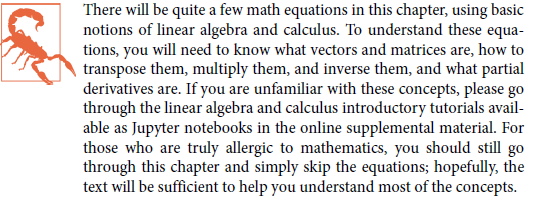

## Linear Regression

In chapter 1, we looked at a simple regression model of life satisfaction: 

**life_satisfaction** = $\theta_{0}+\theta_{1}$x$GDPpercapita$

This model is just a linear function of the input features where $\theta_{0}$ and $\theta_{1}$ are the model's parameters.

More generally, a linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the *bias term / intercept*.

**Linear Regression model prediction**

$\hat{y}=\theta_{0}+\theta_{1}X_{1}+...\theta_{n}X_{n}$, where:

* $\hat{y}$ is the predicted value

* n is the number of features

* $X_{i}$ is the ith feature value

* $\theta_{j}$ is the jth model parameter

This can all be written more concisely in a vectorized form:

**Linear Regression (vectorized form)**

$\hat{y} = h_{\theta}(X) = \theta \cdot X$, where:

* $\theta$ is the models *parameter vector*

* x is the instance's feature vector

* $\theta \cdot X$ is the dot product of the vectors $\theta$ and $X$

* $h_{\theta}(X)$ is the hypothesis function using the model parameters $\theta$

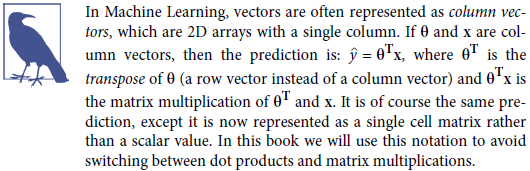

So, that's the linear regression model, but how do we train it?
First, we need a measure that tells us how well the models parameters fit the data. In Chapter 2, we saw that the most common performance measure of a regression model is the RMSE. In practice however, it is simpler to minimize the Mean Square Error (MSE) than the RMSE, and they both lead to the same result (*because a value that minimizes a function also minimizes its square root)

$ MSE(X, h_{\theta}) = (\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}$

### Computational Complexity



The normal equation computes the inverse of $X^{T}X$, which is an $(n+1) x (n+1)$ matrix (where $n$ is the number of features). The computational complexity of inverting such a matrix is typically about $O(n^{2.4})$ to $O(n^{3})$

The SVD approach used by Scikit-Learn's **LinearRegression()** class is about $O(n^{2})$. If you double the amount of features, you multiply the computation time by about $4$.

Now we will look at very different ways to train a Linear Regression model, better suited for cases where there are a large number of features or too many training instances to fit into memory.

## Gradient Descent

*Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of gradient descent is to tweak parameters iteratively in order to minimize a cost function.

Suppose you are lost in the mountains in a dense fog; you can only feel the slope of the ground below your feet. A good strategy to get to the bottom of the valley quickly is to go downhill in the direction of the steepest slope. This is exactly what Gradient Descent does: it measures the local gradient of the error function with regards to the parameter vector $\theta$, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum!

Concretely, you start by filling $\theta$ with random values (called *random initialization*), and then you improve it gradually, taking one step at a time, each step attempts to decrease the cost function (like the MSE), until the algorithm converges to a minimum.

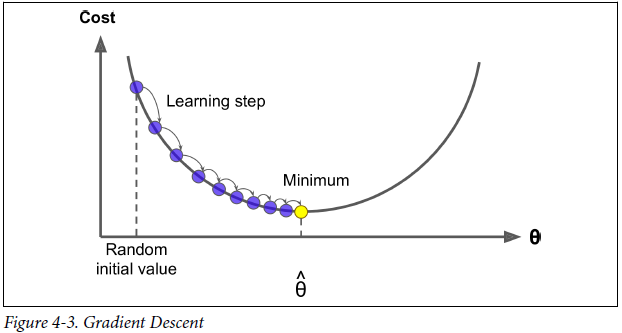

An important parameter in GD is the size of the steps, also called the *learning rate* hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time.

It should be noted that not all cost functions look like nice parabolas. There may be holes, ridges, plateaus, and all sorts of irregular terrain, which makes converging to a global minimum that much more difficult.

Fortunately, the MSE cost function is *convex*, meaning if you pick any two points on the curve, the line segment joining them never crosses the curve. This implies that there are NOT any local minima and just one global minimum.

Considering that fact, GD is guaranteed to approach closely to the global minimum (if you wait long enough).

**Notes**

When using Gradient Descent, you should ensure that all of the features have a similar scale, or else it will take much longer to converge. (why tho?)

### Batch Gradient Descent

